Sample
* A subset from a larger population

Population
* The larger data set or idea of a data set

N (n)
* The size of the population (sample)

Random Sampling
* Drawing elements into a sample at random

Stratified Sampling
* Dividing the population into a strata and randomly sampling from each strata.

Stratum
* A homonegeneous subgroup of a population with common characteristics

Simple random sample
* The sample that results from random sampling without stratification

Bias
* Systematic error in the sample

Sample Bias
* A sample that misrepresents the population.

Sample mean
* the symbol $$(\bar{x})$$ is the sample mean, whereas the population mean is $$(\mu)$$

Selection Bias
* Selectively choosing the data that supports a hypothesis.

Data snooping
* Bias resulting from the way in which observations are selected.

Vast search effect
* Bias resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

Regression to the Mean
* Phenomenon involving successive measurements on a given variable, extreme observations tend to be followed by more central ones.
* For example; if a student scores 100% on a test, they are likely to score lower on the next test.

Sample statistic
* A metric calculated for a sample of data drawn from a larger population. The distribution is likely to be more regular and bell-shaped than the distribution of the data itself.

Data Distribution
* The frequency distribution of individual values in a data set.

Sampling Distribution
* The frequency distribution of a sample statistic over many samples.

Central limit theorem
* The tendency of the sampling distribution to take on a normal shape as the size rises.

Standard error
* The variability or standard deviation of sample statistic over many sample samples.

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy import stats

In [24]:
df = pd.read_csv('/home/satire/PycharmProjects/Statistics/csv/Top 100 tiktokers in 2025.csv', delimiter=',', encoding='latin1')
df

,Rank,Username,Followers,Following,Uploads,Likes
0,1,Khabane lame,162400000,78,1251,2500000000
1,2,charli d'amelio,155700000,1304,2812,11800000000
2,3,MrBeast,107500000,362,394,1100000000
3,4,Bella Poarch,94300000,649,771,2400000000
4,5,Addison Rae,88500000,1,318,5200000000
...,...,...,...,...,...,...
95,96,Arnaldo Mangini,32300000,105,2052,251800000
96,97,Fujiiian,32300000,464,1571,1900000000
97,98,Surthycooks,32300000,176,1242,918400000
98,99,Faisal shaikh,3200000,0,456,2000000000


In [25]:
max_registrations = len(df['Followers'])
print(max_registrations)

100


In [26]:
df.columns

Index(['Rank', 'Username', 'Followers', 'Following', 'Uploads', 'Likes'], dtype='object')

In [27]:
df.isna().sum()

Rank         0
Username     0
Followers    0
Following    0
Uploads      0
Likes        0
dtype: int64

In [28]:
sample_data = pd.DataFrame({
    'Followers': df['Followers'].sample(10),
    'Type': 'Data',
})
sample_data

,Followers,Type
44,42900000,Data
68,37000000,Data
65,37500000,Data
18,56300000,Data
45,42700000,Data
38,44700000,Data
80,34500000,Data
27,51000000,Data
52,40300000,Data
20,55400000,Data


In [29]:
sample_mean_05 = pd.DataFrame({
    'Followers': [df['Followers'].sample(5).mean() for i in range(10)],
    'Type': 'Mean of 5',
})
sample_mean_05

,Followers,Type
0,43300000.0,Mean of 5
1,43480000.0,Mean of 5
2,52360000.0,Mean of 5
3,38160000.0,Mean of 5
4,37100000.0,Mean of 5
5,45040000.0,Mean of 5
6,41580000.0,Mean of 5
7,38800000.0,Mean of 5
8,43500000.0,Mean of 5
9,53700000.0,Mean of 5


In [30]:
sample_mean_20 = pd.DataFrame({
    'Followers': [df['Followers'].sample(20).mean() for i in range(10)],
    'Type': 'Mean of 20',
})
sample_mean_20

,Followers,Type
0,43395000.0,Mean of 20
1,53215000.0,Mean of 20
2,40845000.0,Mean of 20
3,53645000.0,Mean of 20
4,46735000.0,Mean of 20
5,54760000.0,Mean of 20
6,78475000.0,Mean of 20
7,51745000.0,Mean of 20
8,46160000.0,Mean of 20
9,72280000.0,Mean of 20


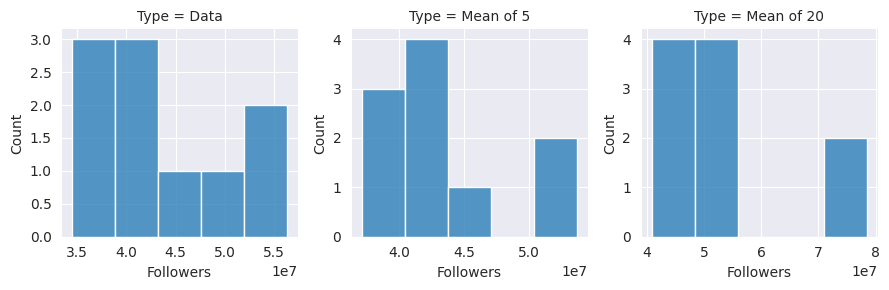

In [31]:
data = pd.concat([sample_data, sample_mean_05, sample_mean_20])
g = sns.FacetGrid(data, col="Type", sharex=False, sharey=False)
g.map(sns.histplot, "Followers")
plt.show()

Central Limit Theorem
* The mean drawn from multiple samples will resemble the familiar bell-shaped normal curve as the sample size increases. Allows normal-approximation formulas like the t-distribution to be used in calculating sampling distributions for inference (confidence intervals, hypothesis tests).

Standard Error
* Is a single metric that sums up the variability in the sampling distribution for a statistic. The standard error can be estimated using a statistic based on the standard deviation of the sample and the sample size.
* Formula
$$SE = \frac{s}{\sqrt{n}}$$
* As the sample size increases, the standard error decreases.
* Square root of the sample size is referred to reduce the standard error by a factor of 2, the sample size must be increased by a factor of 4.
* Collect a number of brand-new samples from the population
* For each new sample, calculate the mean.
* Calculate the standard deviation of the statistics from the new samples and use this as an estimate of the standard error.

The Bootstrap
* One way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional samples with replacement from the sample itself and recalculate the statistic or model for each new sample.

* Bootstrap sample
* A sample taken with replacement from an observed data set.
* Resampling
* The process of taking repeated samples from observed data involves bootstrapping and permutation tests.

* Draw a sample value, record it, and replace it.
* Repeat n times.
* Record the mean of the n resampled values.
* Repeated steps 1-3 R(number of iterations of the bootstrap) times.
* Use the R results to calculate the standard deviation and produce a histogram or boxplot and find a confidence interval.

In [32]:
results = []
for nrepeat in range(1000):
    sample = resample(df['Followers'])
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {df["Followers"].median()}')
print(f'bias: {results.mean() - df["Followers"].median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 40850000.0
bias: 430450.0
std. error: 1483538.3998008557


Confidence Intervals
* Another way to understand the potential error in sample estimate.

Confidence level
* The percentage of the confidence intervals

Intervals endpoints
* The top and bottom of the confidence interval.

Given a sample of size n, and a sample statistic of interest, the algorithm for a boostrap confidence interval is as follows
* Draw a random sample of size n with replacement from the data.
* Record the statistic of interest for the sample.
* Repeat steps 1-2 R times.
* For and x% confidence interval, trim (100-x)/2% of the R results from each end of the distribution.
* The trim points are the endpoints of an x% confidence interval.
* The percentage associated with the confidence interval is termed the level of confidence, the higher level of confidence, the wider the interval, also greater the uncertainty.

Normal Distribution
* The bell-shaped curve.

Error
* The difference between a data point and a predicted value.

Standardize
* Subtract the mean and divide by the standard deviation.

Z-score
* The result of standardizing a value.

Standard normal
* A normal distribution with a mean of 0 and a standard deviation of 1.

QQ plot
* A plot to visualize how close a sample distribution is to a normal distribution.
* If the points roughly fall on the diagonal line, then the sample distribution can be considered normal.

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

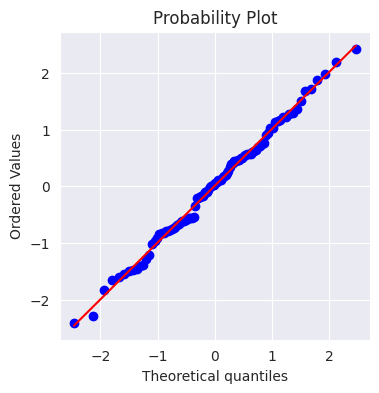

In [33]:
fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

* Converting the data to z-scores just puts the data on the same scale as the standard normal distribution.

Long-Tailed Distributions

Tail
* The long narrow portion of a distribution, where extreme values are found.

Skew
* Where one tail of a distribution is longer than the other.